# Genomics of Drug Sensitivity in Cancer Patients

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preprocessing

In [2]:
df = pd.read_csv('./data/GDSC_DATASET.csv')

In [3]:
df.head(10)

,COSMIC_ID,CELL_LINE_NAME,TCGA_DESC,DRUG_ID,DRUG_NAME,LN_IC50,AUC,Z_SCORE,GDSC Tissue descriptor 1,GDSC Tissue descriptor 2,Cancer Type (matching TCGA label),Microsatellite instability Status (MSI),Screen Medium,Growth Properties,CNA,Gene Expression,Methylation,TARGET,TARGET_PATHWAY
0,683667,PFSK-1,MB,1003,Camptothecin,-1.463887,0.930220,0.433123,nervous_system,medulloblastoma,MB,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
1,684057,ES5,UNCLASSIFIED,1003,Camptothecin,-3.360586,0.791072,-0.599569,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
2,684059,ES7,UNCLASSIFIED,1003,Camptothecin,-5.044940,0.592660,-1.516647,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
3,684062,EW-11,UNCLASSIFIED,1003,Camptothecin,-3.741991,0.734047,-0.807232,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
4,684072,SK-ES-1,UNCLASSIFIED,1003,Camptothecin,-5.142961,0.582439,-1.570016,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Semi-Adherent,Y,Y,Y,TOP1,DNA replication
5,687448,COLO-829,SKCM,1003,Camptothecin,-1.235034,0.867348,0.557727,skin,melanoma,SKCM,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
6,687452,5637,BLCA,1003,Camptothecin,-2.632632,0.834067,-0.203221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TOP1,DNA replication
7,687455,RT4,BLCA,1003,Camptothecin,-2.963191,0.821438,-0.383200,urogenital_system,Bladder,BLCA,MSS/MSI-L,D/F12,Adherent,Y,Y,Y,TOP1,DNA replication
8,687457,SW780,BLCA,1003,Camptothecin,-1.449138,0.905050,0.441154,urogenital_system,Bladder,BLCA,MSS/MSI-L,D/F12,Adherent,Y,Y,Y,TOP1,DNA replication
9,687459,TCCSUP,BLCA,1003,Camptothecin,-2.350633,0.843430,-0.049682,urogenital_system,Bladder,BLCA,MSS/MSI-L,D/F12,Adherent,Y,Y,Y,TOP1,DNA replication


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242035 entries, 0 to 242034
Data columns (total 19 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   COSMIC_ID                                242035 non-null  int64  
 1   CELL_LINE_NAME                           242035 non-null  object 
 2   TCGA_DESC                                240968 non-null  object 
 3   DRUG_ID                                  242035 non-null  int64  
 4   DRUG_NAME                                242035 non-null  object 
 5   LN_IC50                                  242035 non-null  float64
 6   AUC                                      242035 non-null  float64
 7   Z_SCORE                                  242035 non-null  float64
 8   GDSC Tissue descriptor 1                 232669 non-null  object 
 9   GDSC Tissue descriptor 2                 232669 non-null  object 
 10  Cancer Type (matching TCGA label

In [5]:
df.describe()

,COSMIC_ID,DRUG_ID,LN_IC50,AUC,Z_SCORE
count,2.420350e+05,242035.000000,242035.000000,242035.000000,242035.000000
mean,9.921071e+05,1594.044886,2.817111,0.882593,0.000006
std,2.209814e+05,398.739728,2.762191,0.146998,0.999390
min,6.836670e+05,1003.000000,-8.747724,0.006282,-8.254501
25%,9.068050e+05,1149.000000,1.508054,0.849452,-0.656842
50%,9.097200e+05,1631.000000,3.236744,0.944197,0.010585
75%,1.240144e+06,1912.000000,4.700111,0.974934,0.656036
max,1.789883e+06,2499.000000,13.820189,0.998904,7.978776


In [6]:
df.isnull().sum()

COSMIC_ID                                      0
CELL_LINE_NAME                                 0
TCGA_DESC                                   1067
DRUG_ID                                        0
DRUG_NAME                                      0
LN_IC50                                        0
AUC                                            0
Z_SCORE                                        0
GDSC Tissue descriptor 1                    9366
GDSC Tissue descriptor 2                    9366
Cancer Type (matching TCGA label)          51446
Microsatellite instability Status (MSI)    12353
Screen Medium                               9366
Growth Properties                           9366
CNA                                         9366
Gene Expression                             9366
Methylation                                 9366
TARGET                                     27155
TARGET_PATHWAY                                 0
dtype: int64

## Data Preprocessing

In [25]:
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [30]:
missing_data = df[df.isnull().any(axis=1)]
non_missing_data = df.dropna()

print(f'Missing data: {missing_data.head(10)}')
print(f'Non missing data: {non_missing_data.head(10)}')

Missing data:     COSMIC_ID CELL_LINE_NAME     TCGA_DESC   DRUG_ID     DRUG_NAME   LN_IC50  \
1   -1.394012            ES5  UNCLASSIFIED -1.482285  Camptothecin -2.236525   
2   -1.394003            ES7  UNCLASSIFIED -1.482285  Camptothecin -2.846316   
3   -1.393989          EW-11  UNCLASSIFIED -1.482285  Camptothecin -2.374606   
4   -1.393944        SK-ES-1  UNCLASSIFIED -1.482285  Camptothecin -2.881803   
6   -1.378649           5637          BLCA -1.482285  Camptothecin -1.972983   
22  -1.377979       NCI-H720  UNCLASSIFIED -1.482285  Camptothecin -0.826997   
24  -1.377165        COR-L23  UNCLASSIFIED -1.482285  Camptothecin -1.657815   
39  -1.376943       NCI-H661  UNCLASSIFIED -1.482285  Camptothecin -1.235360   
61  -1.375621       VA-ES-BJ  UNCLASSIFIED -1.482285  Camptothecin -2.253488   
62  -1.259105       VMRC-LCD          LUAD -1.482285  Camptothecin -0.686663   

         AUC   Z_SCORE GDSC Tissue descriptor 1   GDSC Tissue descriptor 2  \
1  -0.622604 -0.599942     

In [33]:
kmeans = KMeans(n_clusters=7, random_state=42)
non_missing_data['Cluster'] = kmeans.fit_predict(non_missing_data[numeric_cols])

C:\Users\azamm\AppData\Local\Temp\ipykernel_24740\1911538296.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_missing_data['Cluster'] = kmeans.fit_predict(non_missing_data[numeric_cols])


In [36]:
missing_data['Cluster'] = kmeans.predict(missing_data[numeric_cols].fillna(0))

C:\Users\azamm\AppData\Local\Temp\ipykernel_24740\1111006295.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_data['Cluster'] = kmeans.predict(missing_data[numeric_cols].fillna(0))


In [37]:
def impute_cluster_values(cluster, column, data, method="median"):
    cluster_data = data[data["Cluster"] == cluster]
    if method == "mean":
        return cluster_data[column].mean()
    elif method == "median":
        return cluster_data[column].median()

In [40]:
for column in missing_data.columns:
    if column in numeric_cols and missing_data[column].isnull().any():
        for cluster in missing_data["Cluster"].unique():
            value = impute_cluster_values(cluster, column, non_missing_data[numeric_cols])
            missing_data.loc[
                (missing_data["Cluster"] == cluster) & (missing_data[column].isnull()), column
            ] = value

In [41]:
final_data = pd.concat([non_missing_data.drop(columns="Cluster"), missing_data.drop(columns="Cluster")])

In [43]:
final_data.to_csv("processed_numeric_data.csv", index=False)
print("Preprocessing complete. Data saved to 'processed_data.csv'.")

Preprocessing complete. Data saved to 'processed_data.csv'.


In [44]:
categorical_cols = df.select_dtypes(include=["object", "category"]).columns
print(f"Categorical columns: {categorical_cols}")

Categorical columns: Index(['CELL_LINE_NAME', 'TCGA_DESC', 'DRUG_NAME', 'GDSC Tissue descriptor 1',
       'GDSC Tissue descriptor 2', 'Cancer Type (matching TCGA label)',
       'Microsatellite instability Status (MSI)', 'Screen Medium',
       'Growth Properties', 'CNA', 'Gene Expression', 'Methylation', 'TARGET',
       'TARGET_PATHWAY'],
      dtype='object')


In [45]:
def impute_cluster_mode(cluster, column, data):
    """Calculates the mode (most frequent category) 
       of the column for the given cluster.
    """
    mode_result = data[data["Cluster"] == cluster][column].mode()
    return mode_result[0] if not mode_result.empty else "Missing"

In [46]:
for column in missing_data.columns:
    if column in categorical_cols and missing_data[column].isnull().any():
        for cluster in missing_data["Cluster"].unique():
            value = impute_cluster_mode(cluster, column, non_missing_data)
            missing_data.loc[
                (missing_data["Cluster"] == cluster)
                & (missing_data[column].isnull()),
                column,
            ] = value

In [47]:
final_data = pd.concat([non_missing_data.drop(columns="Cluster"), missing_data.drop(columns="Cluster")])

In [48]:
final_data.to_csv("final_cleaned_data.csv", index=False)
print("Preprocessing complete. Data saved to 'final_cleaned_data.csv'.")

Preprocessing complete. Data saved to 'processed_data.csv'.


## Visualizations

In [49]:
sns.set_theme(style="whitegrid")

In [50]:
cleaned_df = pd.read_csv("./data/final_cleaned_data.csv")

### Distribution plot for LN_IC50

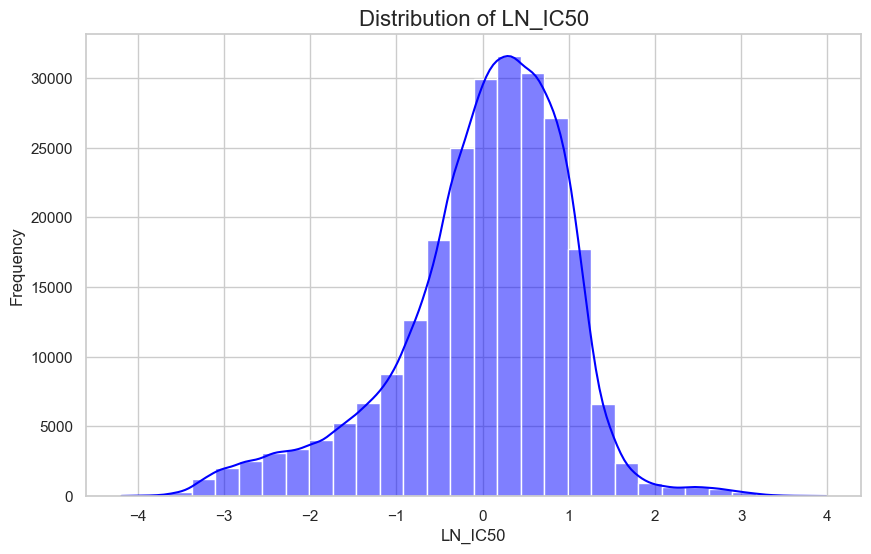

In [51]:
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_df['LN_IC50'], kde=True, bins=30, color='blue')
plt.title('Distribution of LN_IC50', fontsize=16)
plt.xlabel('LN_IC50', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

### Significance: Helps to understand the spread and central tendency of the LN_IC50 values, which can indicate drug sensitivity trends.


### Correlation heatmap for numeric variables

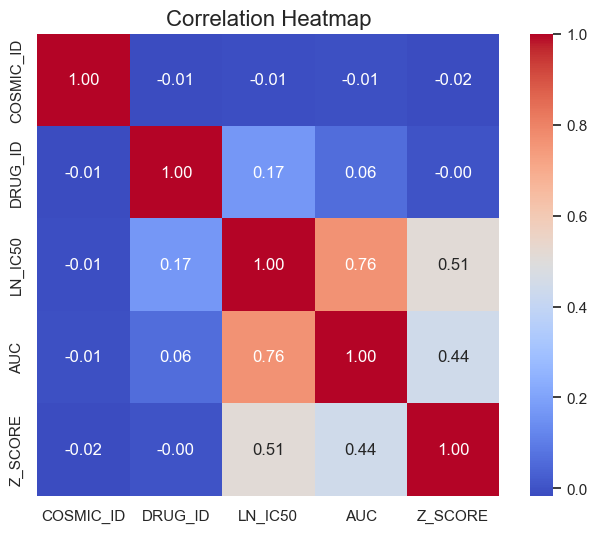

In [52]:
correlation_matrix = cleaned_df[numeric_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

### Significance: Identifies relationships between numeric variables, useful for feature selection or hypothesis testing.

### Count plot for TCGA_DESC

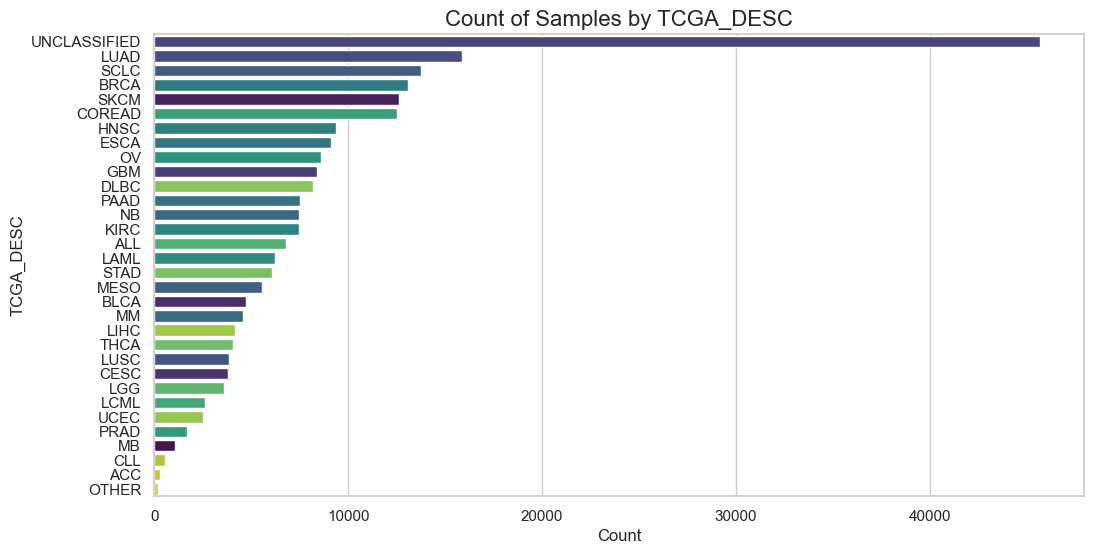

In [54]:
plt.figure(figsize=(12, 6))
sns.countplot(y=cleaned_df['TCGA_DESC'], order=cleaned_df['TCGA_DESC'].value_counts().index, palette='viridis', hue=cleaned_df['TCGA_DESC'])
plt.title('Count of Samples by TCGA_DESC', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('TCGA_DESC', fontsize=12)
plt.show()

### Significance: Provides insight into the distribution of cancer types, highlighting imbalances or dominant types.

### Boxplot of AUC by Cancer Type

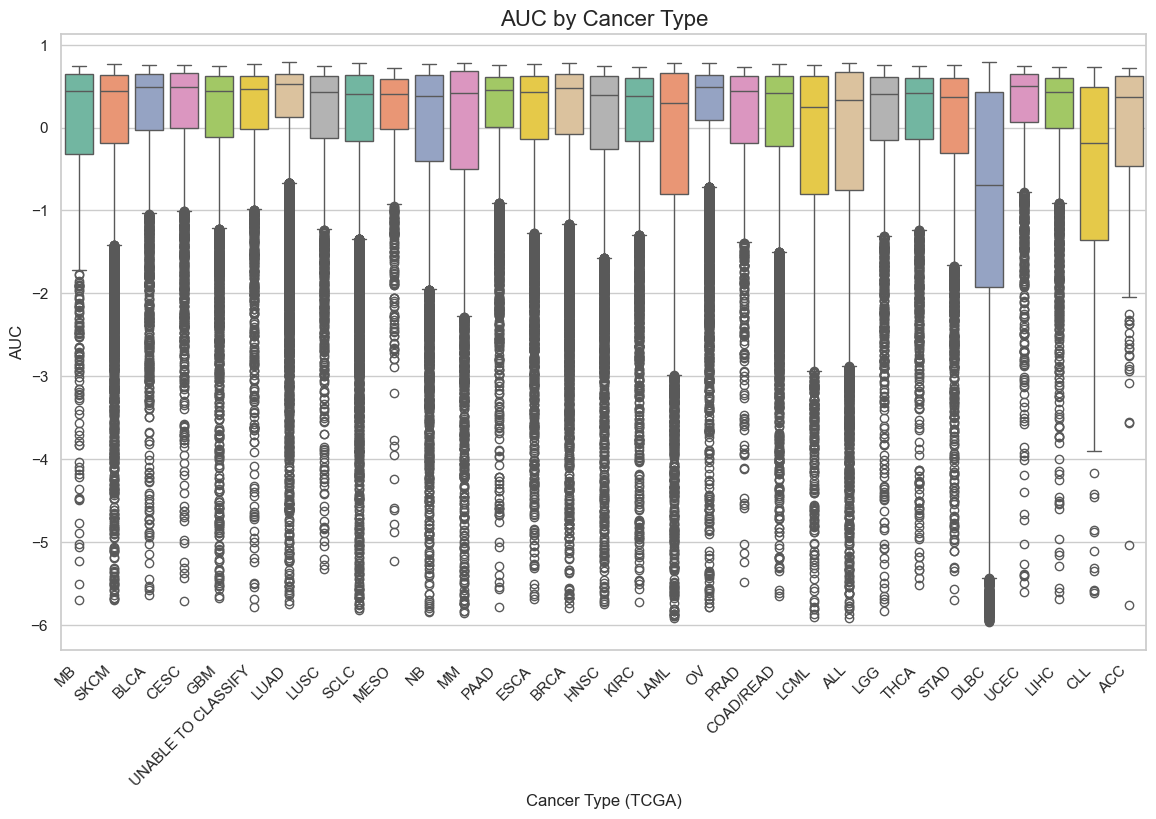

In [56]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=cleaned_df, x='Cancer Type (matching TCGA label)', y='AUC', palette='Set2', hue='Cancer Type (matching TCGA label)')
plt.title('AUC by Cancer Type', fontsize=16)
plt.xlabel('Cancer Type (TCGA)', fontsize=12)
plt.ylabel('AUC', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

### Significance: Shows variation in drug effectiveness (AUC) across different cancer types, useful for tailored treatments.

### Scatter plot: LN_IC50 vs AUC


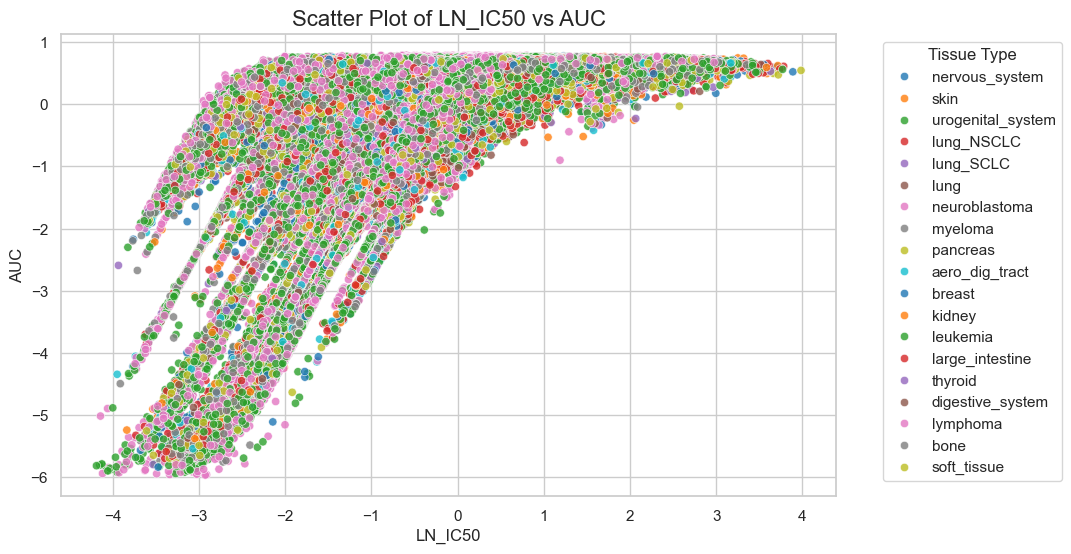

In [57]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cleaned_df, x='LN_IC50', y='AUC', hue='GDSC Tissue descriptor 1', palette='tab10', alpha=0.8)
plt.title('Scatter Plot of LN_IC50 vs AUC', fontsize=16)
plt.xlabel('LN_IC50', fontsize=12)
plt.ylabel('AUC', fontsize=12)
plt.legend(title='Tissue Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Significance: Explores the relationship between drug sensitivity (LN_IC50) and effectiveness (AUC), segmented by tissue type.

### Count plot for TARGET_PATHWAY

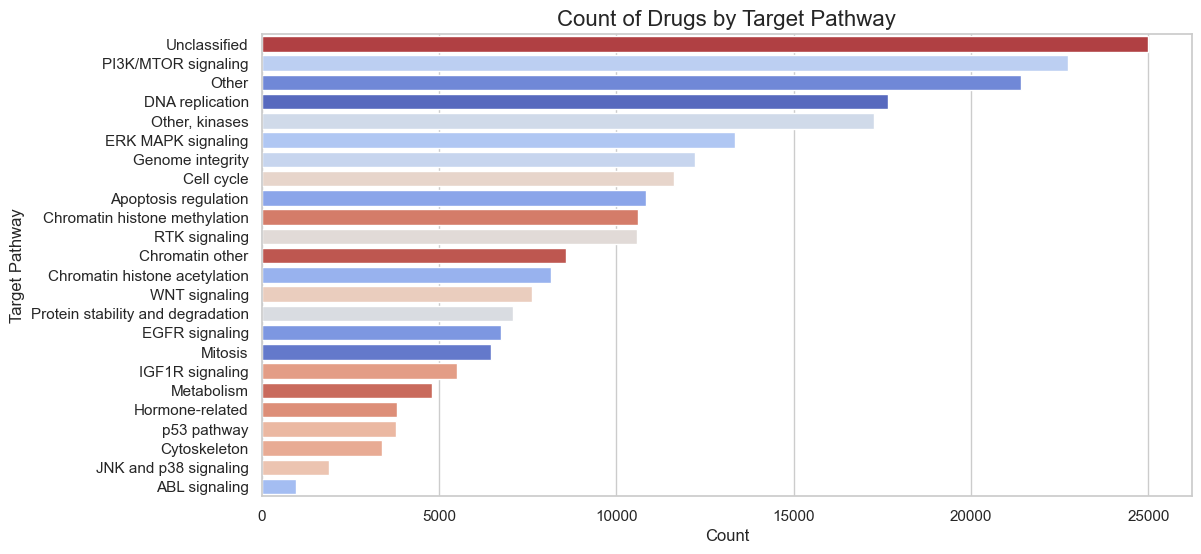

In [59]:
plt.figure(figsize=(12, 6))
sns.countplot(y=cleaned_df['TARGET_PATHWAY'], order=cleaned_df['TARGET_PATHWAY'].value_counts().index, palette='coolwarm', hue=cleaned_df['TARGET_PATHWAY'])
plt.title('Count of Drugs by Target Pathway', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Target Pathway', fontsize=12)
plt.show()

### Significance: Highlights the most frequently targeted pathways, aiding in prioritizing pathway-specific research.

### Count plot for Microsatellite instability Status (MSI)

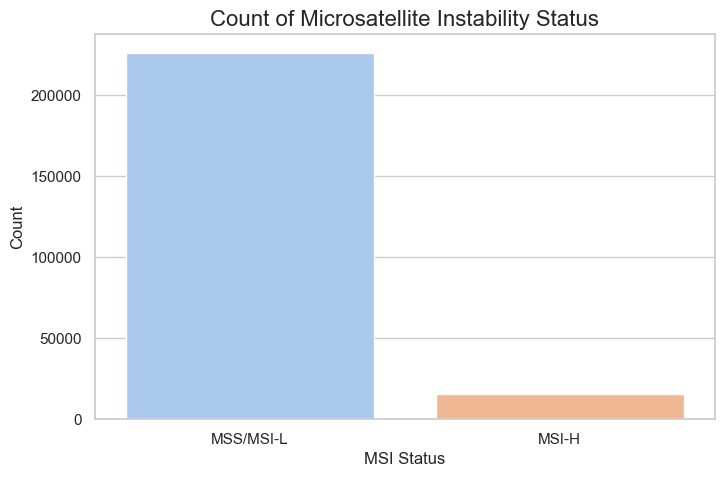

In [62]:
plt.figure(figsize=(8, 5))
sns.countplot(data=cleaned_df, x='Microsatellite instability Status (MSI)', palette='pastel', hue='Microsatellite instability Status (MSI)')
plt.title('Count of Microsatellite Instability Status', fontsize=16)
plt.xlabel('MSI Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


### Significance: Assesses the distribution of MSI status, which is relevant for immunotherapy research.

### Pairplot of Key Numeric Features

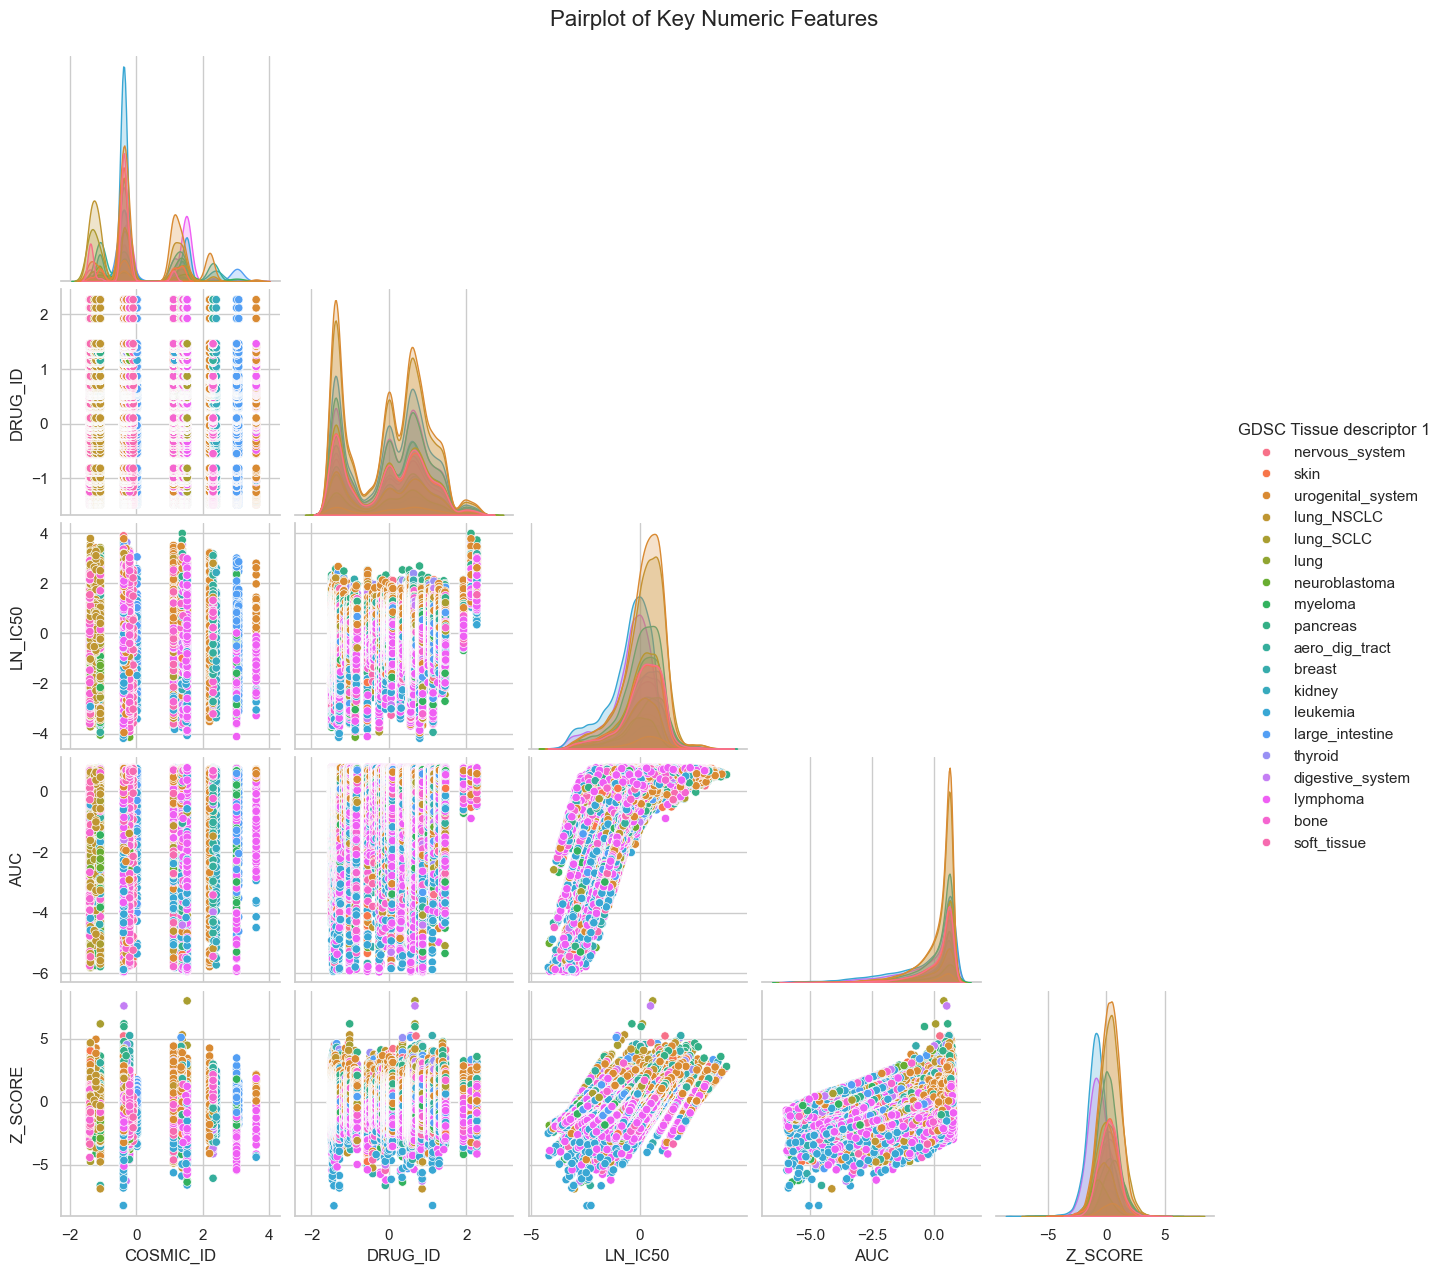

In [64]:
sns.pairplot(cleaned_df, vars=numeric_cols, hue='GDSC Tissue descriptor 1', palette='husl', diag_kind='kde', corner=True)
plt.suptitle('Pairplot of Key Numeric Features', y=1.02, fontsize=16)
plt.show()

### Significance: Visualizes interrelations among key features, enabling identification of patterns and outliers.